### 2022年度計算機演習A・B

# 第5回レポート課題の解説

### 演習1

フィボナッチ数列の第1項から第20項までを要素に持つリストを作成し、そのグラフを描画してください。

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]


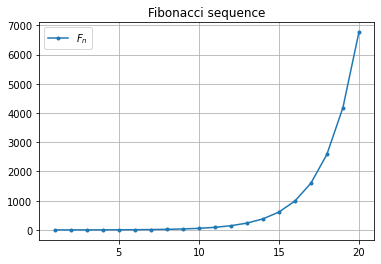

In [1]:
import matplotlib.pyplot as plt

N = 20  #最後の項の番号（変数Nを使うメリットとして、この値を変えるだけで実行結果が変わる）
F_list = [1,1]  #フィボナッチ数列を格納するリスト

for n in range(2,N):  #F_list[0]とF_list[1]を元に、F_list[2]～F_list[N-1]を追加する
    F_list.append(F_list[n-2]+F_list[n-1])

print(F_list)

n_list = range(1,N+1)
plt.plot(n_list,F_list,".-")

plt.grid()
plt.xticks(range(5,N+1,5))  #横軸の目盛りを指定できる
plt.title("Fibonacci sequence")
plt.legend(["$F_n$"])
plt.show()

### 演習2

関数の再帰的定義によって、自然数 $n$ に対してフィボナッチ数列の第 $n$ 項を返す関数`fibonacci`を定義してください。定義した関数を呼び出す例も付けてください。

In [2]:
def fibonacci(n):
    #ここに「print(n)」を入れると、関数が再帰的に呼び出される様子が分かる
    if n == 1 or n == 2:
        return 1
    else:
        return fibonacci(n-2)+fibonacci(n-1)

print(fibonacci(10))

55


#### （注意）

関数の再帰的定義を利用するとコードを簡潔に書くことができる反面、上の`fibonacci`のように関数の一回の処理の中で自身を二回以上呼び出す場合には、引数が大きくなるほどに計算効率が悪くなります。これは、同じ引数に対する計算を何度も行うことで無駄が生じるからです。

### 演習3

フィボナッチ数列 $\{F_n\}$ と黄金比 $\varphi$ の関係を示す一つの性質として、次の式が成り立つことが知られています。

$$
\lim_{n\to\infty}\frac{F_{n+1}}{F_n}=\varphi
$$

次の式で定まる数列 $\{Q_n\}$ に対して第1項から第19項までを用いてグラフを描画することによって、上記の性質を確認してください。

$$
Q_n=\frac{F_{n+1}}{F_n}
$$

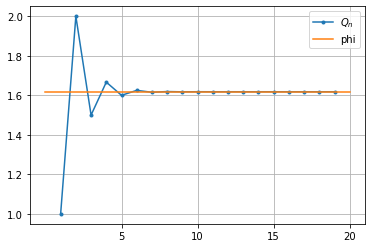

In [3]:
import matplotlib.pyplot as plt

N = 20
F_list = [1,1]
for n in range(2,N):
    F_list.append(F_list[n-2]+F_list[n-1])
#↑演習1のコード実行後であれば、ここまでは無くてもよい

Q_list = []

for n in range(N-1):  #Q_list[0]～Q_list[N-2]を追加する
    Q_list.append(F_list[n+1]/F_list[n])

n_list = range(1,N)
plt.plot(n_list,Q_list,".-")

phi = (1+5**(1/2))/2  #黄金比
plt.plot([0,N],[phi,phi],"-")  #点(0,phi)と(N,phi)を結ぶ線分を描画する

plt.grid()
plt.xticks(range(5,N+1,5))
plt.legend(["$Q_n$","phi"])
plt.show()

### 演習4（オプション）

フィボナッチ数列に関する上記以外の性質をインターネット等で一つ調べ、プログラミングによってその性質を確認してください。

ゼッケンドルフの定理（Zeckendorf's theorem）

> 任意の自然数は、一つ以上の連続しない相異なるフィボナッチ数列の項の和として一意に表現できる。

ここでは、この定理における「表現の一意性」以外の主張についてプログラミングで確認してみる。

フィボナッチ数列を $\{F_n\}$、任意の $m\in\mathbb{N}$ に対して $m$ 以下の最大のフィボナッチ数列の項の番号を $n_m$ とするとき、

$$
\begin{gathered}
\mathrm{Zeckendorf}(m)=F_{n_m}+\mathrm{Zeckendorf}\left(m-F_{n_m}\right)\quad (m\in\mathbb{N})\\
\mathrm{Zeckendorf}(0)=0
\end{gathered}
$$

により定まる $\mathrm{Zeckendorf}(m)$ が $m\in\mathbb{N}$ に対する上記の表現（ゼッケンドルフ表現）を与えることを利用する。

（※以下のコードはかなり難しいため、無理に理解しなくて大丈夫です。）

In [4]:
N = 20
F_list = [1,1]
for n in range(2,N):
    F_list.append(F_list[n-2]+F_list[n-1])  #フィボナッチ数列を求めておく
print(F_list)

def Zeckendorf(m):  #ゼッケンドルフ表現におけるフィボナッチ数列の項の番号のリストを返す関数
    if m == 0:
        return []  #空のリストを返す
    else:
        n_m = 0  #m以下の最大のフィボナッチ数列の項の番号を求める（プログラム上は番号が0から始まることに注意）
        while F_list[n_m] <= m:
            n_m = n_m+1
        n_m = n_m-1
        return Zeckendorf(m-F_list[n_m])+[n_m]  #再帰的呼び出し　+でリストを結合する

for m in range(1,51):  #1～50のゼッケンドルフ表現を表示する
    index_list = Zeckendorf(m)
    text1 = ""
    text2 = ""
    for n in index_list:
        text1 = text1+"F_"+str(n+1)  #+で文字列を結合する　strは文字列に変換する関数
        text2 = text2+str(F_list[n])
        if n != index_list[-1]:  #リストの最後の要素でなければ（番号に負の数を指定すると末尾から数えた要素になる）
            text1 = text1+"+"
            text2 = text2+"+"
    text = str(m)+" = "+text1+" = "+text2  #表示する文字列をまとめる
    print(text)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]
1 = F_2 = 1
2 = F_3 = 2
3 = F_4 = 3
4 = F_2+F_4 = 1+3
5 = F_5 = 5
6 = F_2+F_5 = 1+5
7 = F_3+F_5 = 2+5
8 = F_6 = 8
9 = F_2+F_6 = 1+8
10 = F_3+F_6 = 2+8
11 = F_4+F_6 = 3+8
12 = F_2+F_4+F_6 = 1+3+8
13 = F_7 = 13
14 = F_2+F_7 = 1+13
15 = F_3+F_7 = 2+13
16 = F_4+F_7 = 3+13
17 = F_2+F_4+F_7 = 1+3+13
18 = F_5+F_7 = 5+13
19 = F_2+F_5+F_7 = 1+5+13
20 = F_3+F_5+F_7 = 2+5+13
21 = F_8 = 21
22 = F_2+F_8 = 1+21
23 = F_3+F_8 = 2+21
24 = F_4+F_8 = 3+21
25 = F_2+F_4+F_8 = 1+3+21
26 = F_5+F_8 = 5+21
27 = F_2+F_5+F_8 = 1+5+21
28 = F_3+F_5+F_8 = 2+5+21
29 = F_6+F_8 = 8+21
30 = F_2+F_6+F_8 = 1+8+21
31 = F_3+F_6+F_8 = 2+8+21
32 = F_4+F_6+F_8 = 3+8+21
33 = F_2+F_4+F_6+F_8 = 1+3+8+21
34 = F_9 = 34
35 = F_2+F_9 = 1+34
36 = F_3+F_9 = 2+34
37 = F_4+F_9 = 3+34
38 = F_2+F_4+F_9 = 1+3+34
39 = F_5+F_9 = 5+34
40 = F_2+F_5+F_9 = 1+5+34
41 = F_3+F_5+F_9 = 2+5+34
42 = F_6+F_9 = 8+34
43 = F_2+F_6+F_9 = 1+8+34
44 = F_3+F_6+F_9 = 2+8+34